# Decision Tree with Count Vectorizer and No Preprocessing
____

###### Importing Libraries

In [1]:
import os
import glob
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

###### Importing Dataset

In [2]:
train_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/pos/'
train_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/neg/'
test_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/pos/'
test_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/neg/'

###### Reading Data from Function

In [3]:
def read_files_in_path(path):
    positive_training_data=[]
    for filepath in glob.glob(os.path.join(path, '*.txt')):
        with open(filepath,encoding='utf8') as f:
            content = f.read()
            positive_training_data.append(content)
    return positive_training_data

###### Reading training data

In [4]:
positive_training_data = read_files_in_path(train_positive_path)
print(len(positive_training_data))

12500


In [5]:
negative_training_data = read_files_in_path(train_negative_path)
print(len(negative_training_data))

12500


In [6]:
whole_training_data = positive_training_data+negative_training_data
print(len(whole_training_data))

25000


###### Reading Test Data

In [7]:
positive_test_data = read_files_in_path(test_positive_path)
print(len(positive_test_data))

12500


In [8]:
negative_test_data = read_files_in_path(test_negative_path)
print(len(negative_test_data))

12500


In [9]:
whole_test_data = positive_test_data+negative_test_data
print(len(whole_test_data))

25000


In [10]:
show_analysis = True
if show_analysis:
    from sklearn.feature_extraction.text import CountVectorizer
    from pandas import DataFrame

    # Applying feature extraction: countVectorizer
    
    vectorizer = CountVectorizer()
    train_vector = vectorizer.fit_transform(whole_training_data)
    test_vector = vectorizer.transform(whole_test_data)
    print("Total Number of Vocabulary:- "+str(len(vectorizer.vocabulary_)))
    print(train_vector.shape)
    
    for i,l in enumerate(vectorizer.vocabulary_.items()):
        if(i<4):
            print(l)
    first_n = str(train_vector)
    first_n = first_n.replace(' ','')
    first_n = first_n.replace('\t',' ')
    first_n = first_n.split('\n')
    print(first_n[0:4])

Total Number of Vocabulary:- 74849
(25000, 74849)
('bromwell', 9251)
('high', 30902)
('is', 34585)
('cartoon', 10850)
['(0,9251) 4', '(0,30902) 5', '(0,34585) 4', '(0,10850) 1']


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Apply feature extraction: countVectorizer

vectorizer = CountVectorizer()
train_vector = vectorizer.fit_transform(whole_training_data)
test_vector = vectorizer.transform(whole_test_data)

###### Creating labels for the training data and test data first 12500 are positive and the remaining 12500 are negative

In [12]:
train_labels = np.asarray([1]*len(positive_training_data) + [0]*len(negative_training_data))
test_labels = np.asarray([1]*len(positive_test_data) + [0]*len(negative_test_data))

###### Printing some visualization of the sizes of the train and test vectors 
train_vector has 25000 row corresponding to the 25000 review and 74849 feature extracted

In [13]:
print(train_labels.shape)
print(train_vector.shape)

(25000,)
(25000, 74849)


###### Print shapes of test vector and label

In [14]:
print(test_labels.shape)
print(test_vector.shape)

(25000,)
(25000, 74849)


###### Some visualization for the labels arrays

In [15]:
print(train_labels)
print(test_labels)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [ ]:
print(vectorizer.vocabulary_)

In [17]:
print(len(vectorizer.vocabulary_))

74849


In [18]:
import time

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd

clf = GridSearchCV(tree.DecisionTreeClassifier(),{'max_depth':[1,3,5,8,10],'criterion':['gini','entropy']},cv=5,return_train_score=False)
clf.fit(train_vector, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [20]:
df=pd.DataFrame(clf.cv_results_)
print(df[['param_criterion','param_max_depth','mean_test_score']])

  param_criterion param_max_depth  mean_test_score
0            gini               1          0.61632
1            gini               3          0.67228
2            gini               5          0.68916
3            gini               8          0.71024
4            gini              10          0.72460
5         entropy               1          0.61632
6         entropy               3          0.67308
7         entropy               5          0.68968
8         entropy               8          0.70436
9         entropy              10          0.71392


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10,criterion='gini')
scores = cross_val_score(clf, train_vector, train_labels, cv=5)

print(scores*100)
print("Mean Accuracy: %0.2f  (+/- %0.2f deviation) " % (scores.mean()*100, scores.std()))

[73.92 72.02 71.86 72.3  71.6 ]
Mean Accuracy: 72.34  (+/- 0.01 deviation) 


In [ ]:
!pip install pydotplus

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydot

In [22]:
import pydot

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [27]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [25]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')
clf_tree.fit(train_vector, train_labels)
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

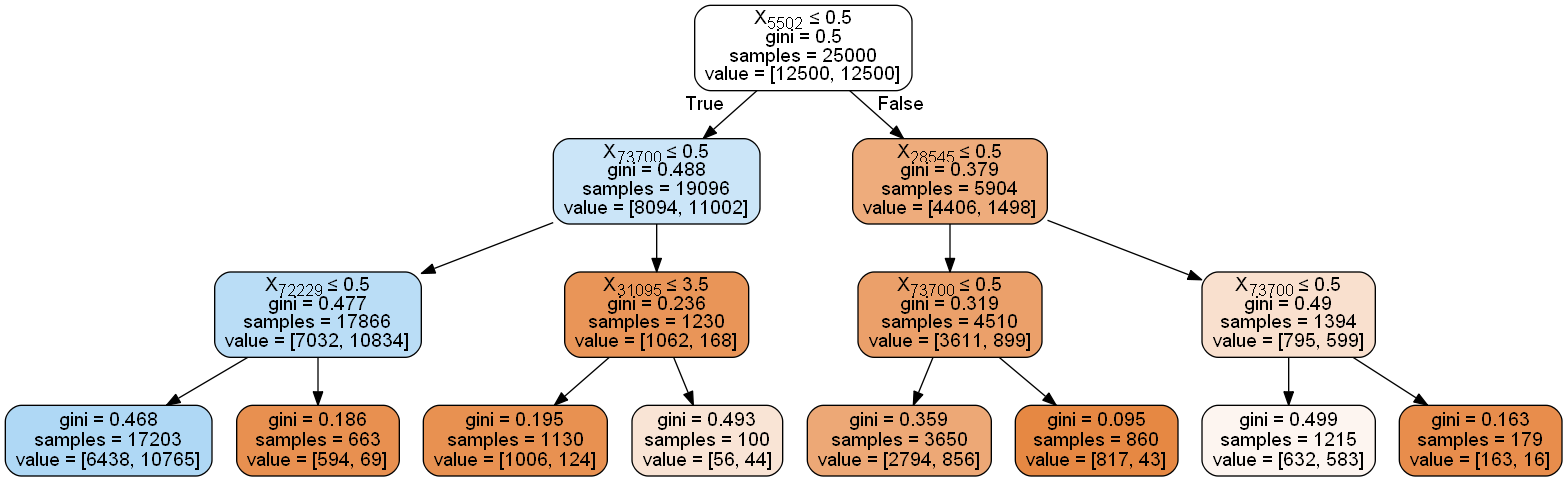

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10,criterion='gini')
clf.fit(train_vector, train_labels)
print("Decision tree classification accuracy:\n",clf.score(test_vector,test_labels)*100,"%")

Decision tree classification accuracy:
 72.476 %
